In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

# EDA
from sklearn import preprocessing

# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# model building
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

#Bagging and boosting
from sklearn.metrics import accuracy_score #importing metrics for accuracy calculation (confusion matrix)
from sklearn.ensemble import BaggingClassifier #bagging combines the results of multipls models to get a generalized result. 
from sklearn.ensemble import AdaBoostClassifier #boosting method attempts to correct the errors of previous models.

# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud =  pd.read_csv("Fraud_check_1.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### EDA

In [3]:
fraud.shape

(600, 6)

In [4]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
# label encoder means to convert categorical data into numerical columns
label_encoder = preprocessing.LabelEncoder() 

In [7]:
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad'])
fraud['Marital.Status'] =label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Urban'] = label_encoder.fit_transform(fraud['Urban'])

In [8]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [9]:
fraud.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int32
dtype: object

In [10]:
fraud.rename({'Undergrad':'UG','Marital.Status':'MS','Taxable.Income':'TI','City.Population':'CP','Work.Experience':'WE'}, axis =1, inplace= True)
fraud

,UG,MS,TI,CP,WE,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [11]:
fraud['TI']= fraud.TI.map(lambda taxable_income: 'Risky' if taxable_income <= 30000 else 'Good')
fraud

,UG,MS,TI,CP,WE,Urban
0,0,2,Good,50047,10,1
1,1,0,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,2,Good,193264,15,1
4,0,1,Good,27533,28,0
...,...,...,...,...,...,...
595,1,0,Good,39492,7,1
596,1,0,Good,55369,2,1
597,0,0,Good,154058,0,1
598,1,1,Good,180083,17,0


In [12]:
x = fraud.iloc[:,[0,1,3,4,5]]
x

,UG,MS,CP,WE,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [13]:
y = fraud['TI']
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TI, Length: 600, dtype: object

In [14]:
#splitting data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state= 10)

### 1.Decision tree using entropy method by -->  C5.0

In [15]:
model_1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3,class_weight= 'balanced') # 
model_1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3)

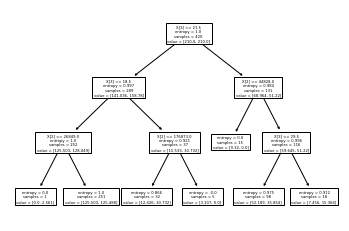

In [16]:
#plto to see clearly
tree.plot_tree(model_1);

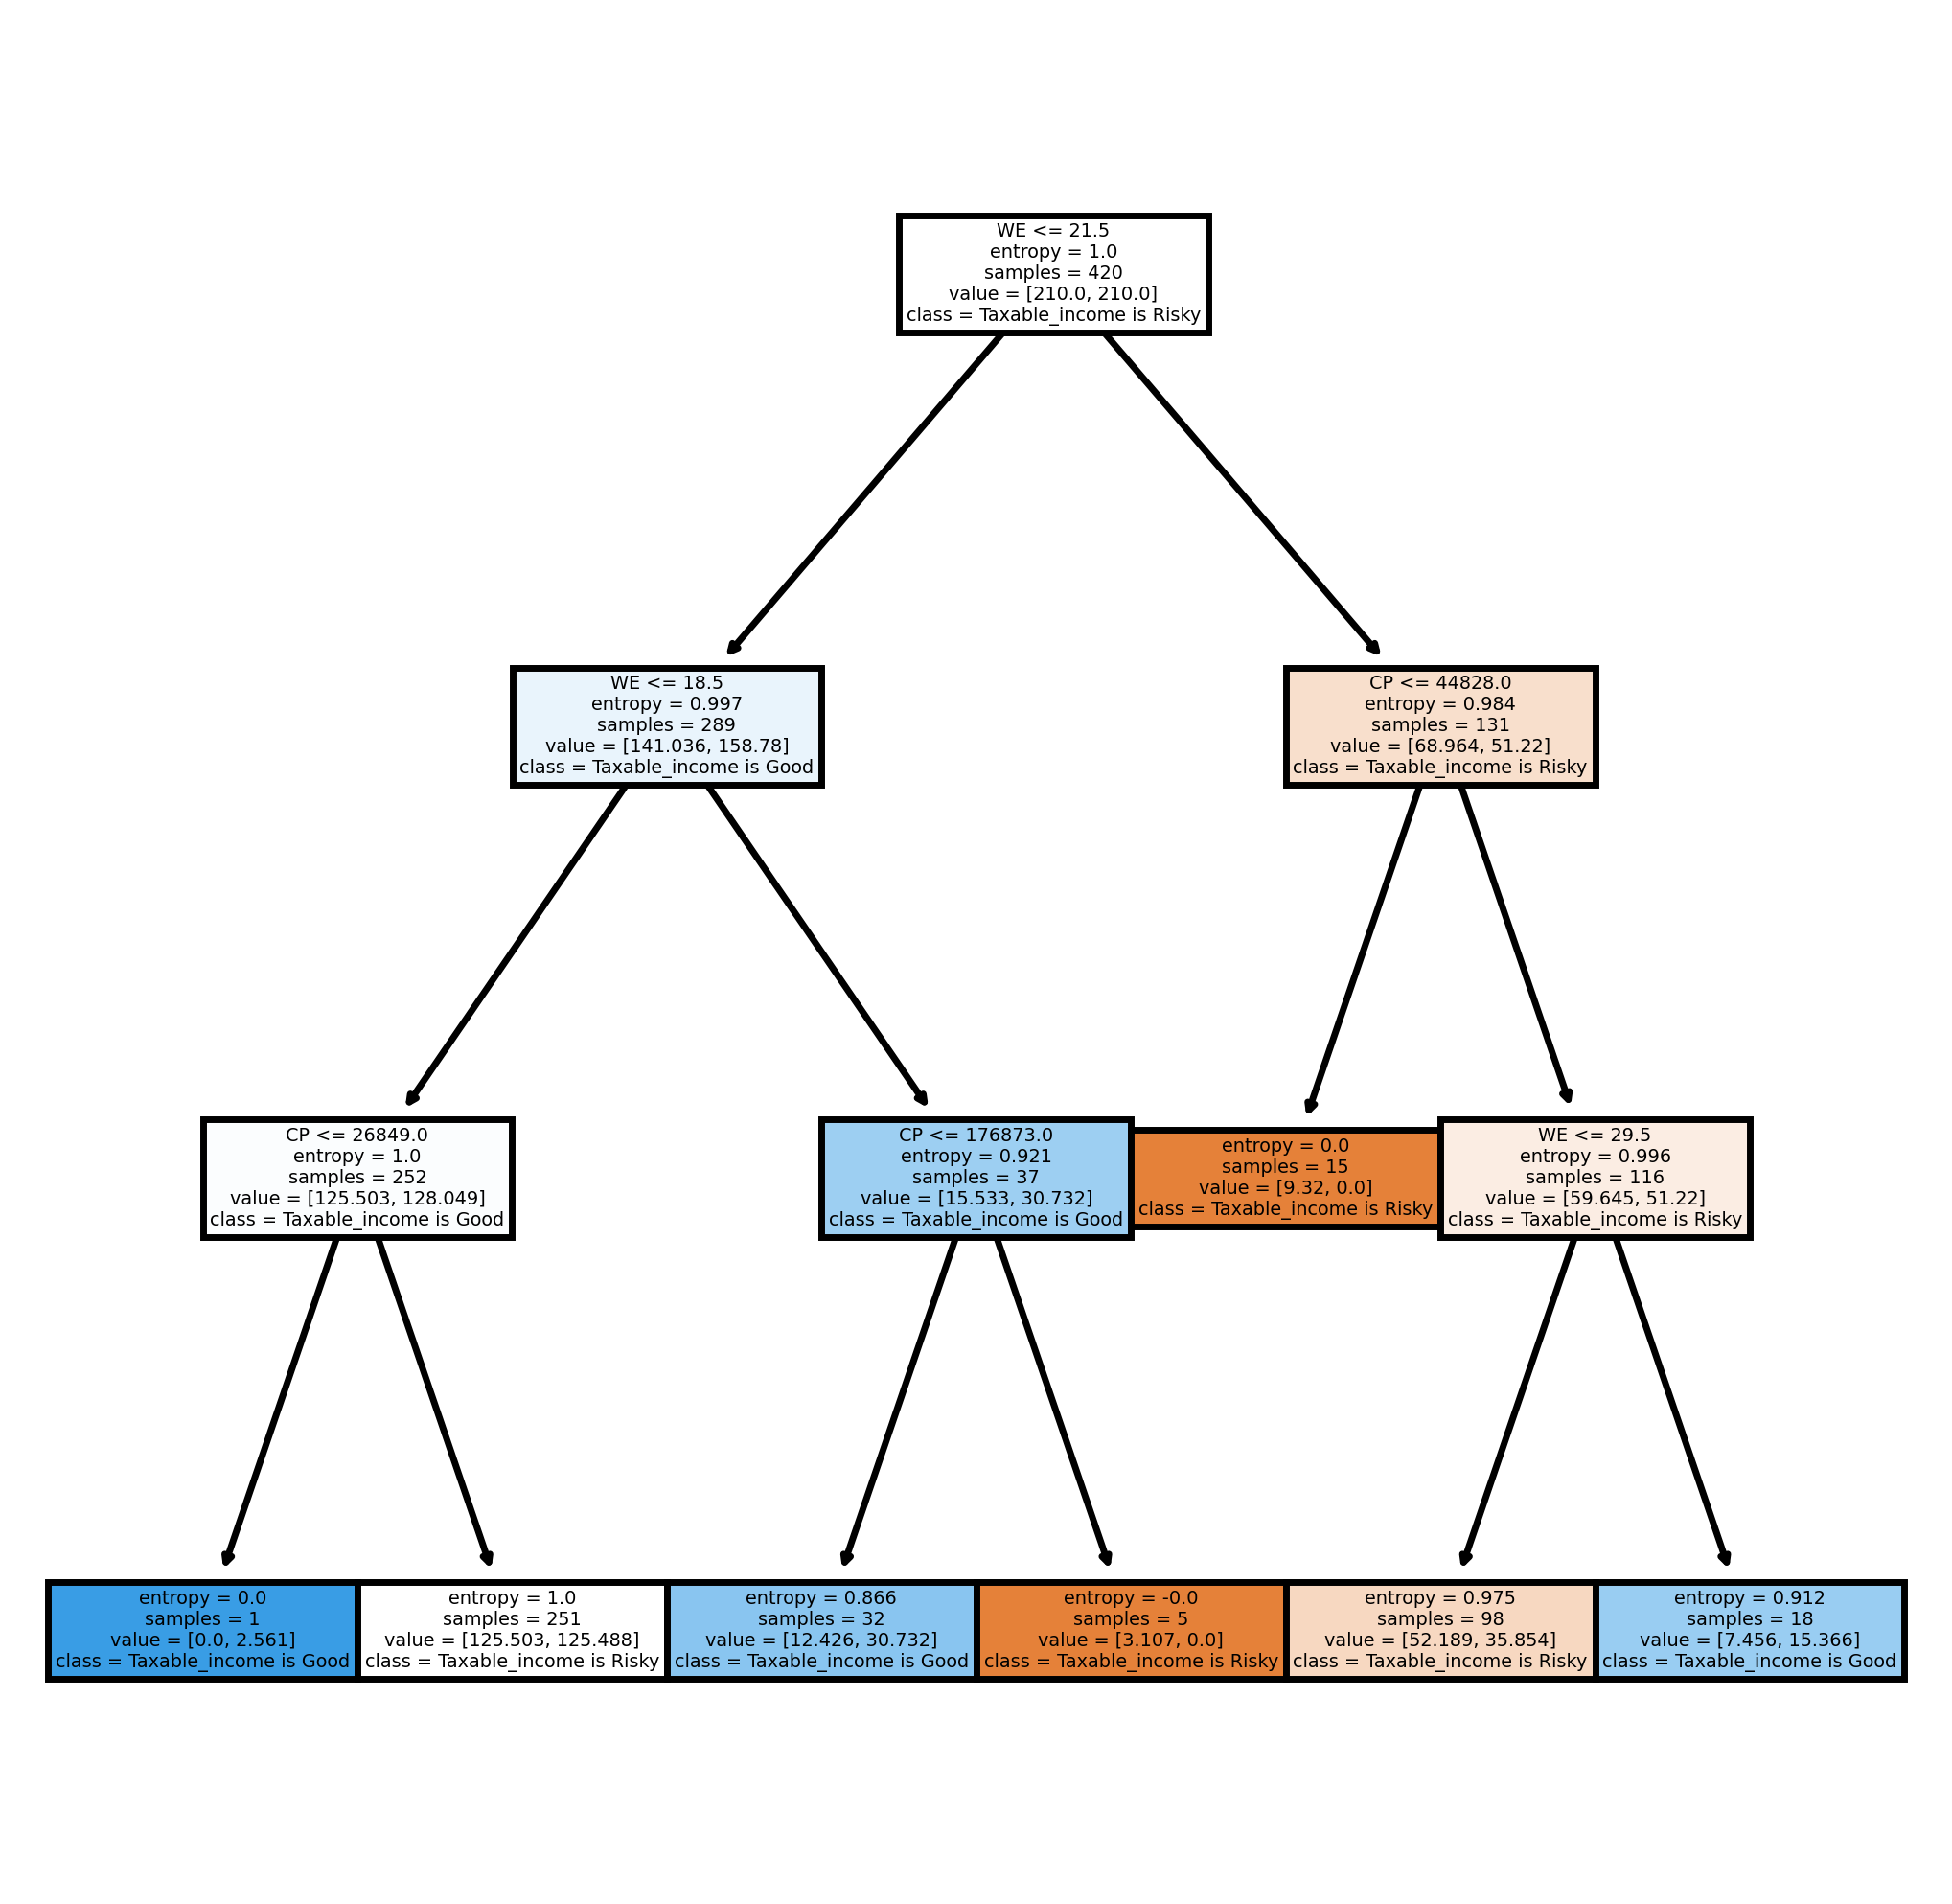

In [17]:
# Extraction features- 
fn = ['UG','MS','CP','WE','Urban']
cn = ['Taxable_income is Risky', 'Taxable_income is Good']
fig, axes = plt.subplots(nrows=1, ncols=1,figsize =(5,5),dpi= 500 )
tree.plot_tree(model_1,
              feature_names=fn,
              class_names= cn,
              filled= True);

In [18]:
#predicting on test data
preds_1= model_1.predict(x_test)
preds_1[0:30]

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good'], dtype=object)

In [19]:
pd.Series(preds_1).value_counts()

Good     157
Risky     23
dtype: int64

In [20]:
# confusion matrix
# In order to check whether the predictions are correct or wrong we will create a cross tab on y_test data

pd.crosstab(preds_1,y_test)   

TI,Good,Risky
row_0,,
Good,121,36
Risky,17,6


In [21]:
#Accuracy
np.mean(preds_1==y_test)*100

70.55555555555556

In [22]:
print(classification_report(preds_1, y_test))

              precision    recall  f1-score   support

        Good       0.88      0.77      0.82       157
       Risky       0.14      0.26      0.18        23

    accuracy                           0.71       180
   macro avg       0.51      0.52      0.50       180
weighted avg       0.78      0.71      0.74       180



In [23]:
print("Accuracy C5:", accuracy_score(y_test,preds_1)*100)

Accuracy C5: 70.55555555555556


### 2.Decision Tree using Gini method by -->  CART

In [24]:
model_2 = DecisionTreeClassifier(criterion='gini', max_depth= 3, class_weight= 'balanced')
model_2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

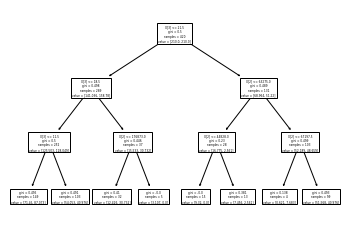

In [25]:
tree.plot_tree(model_2);

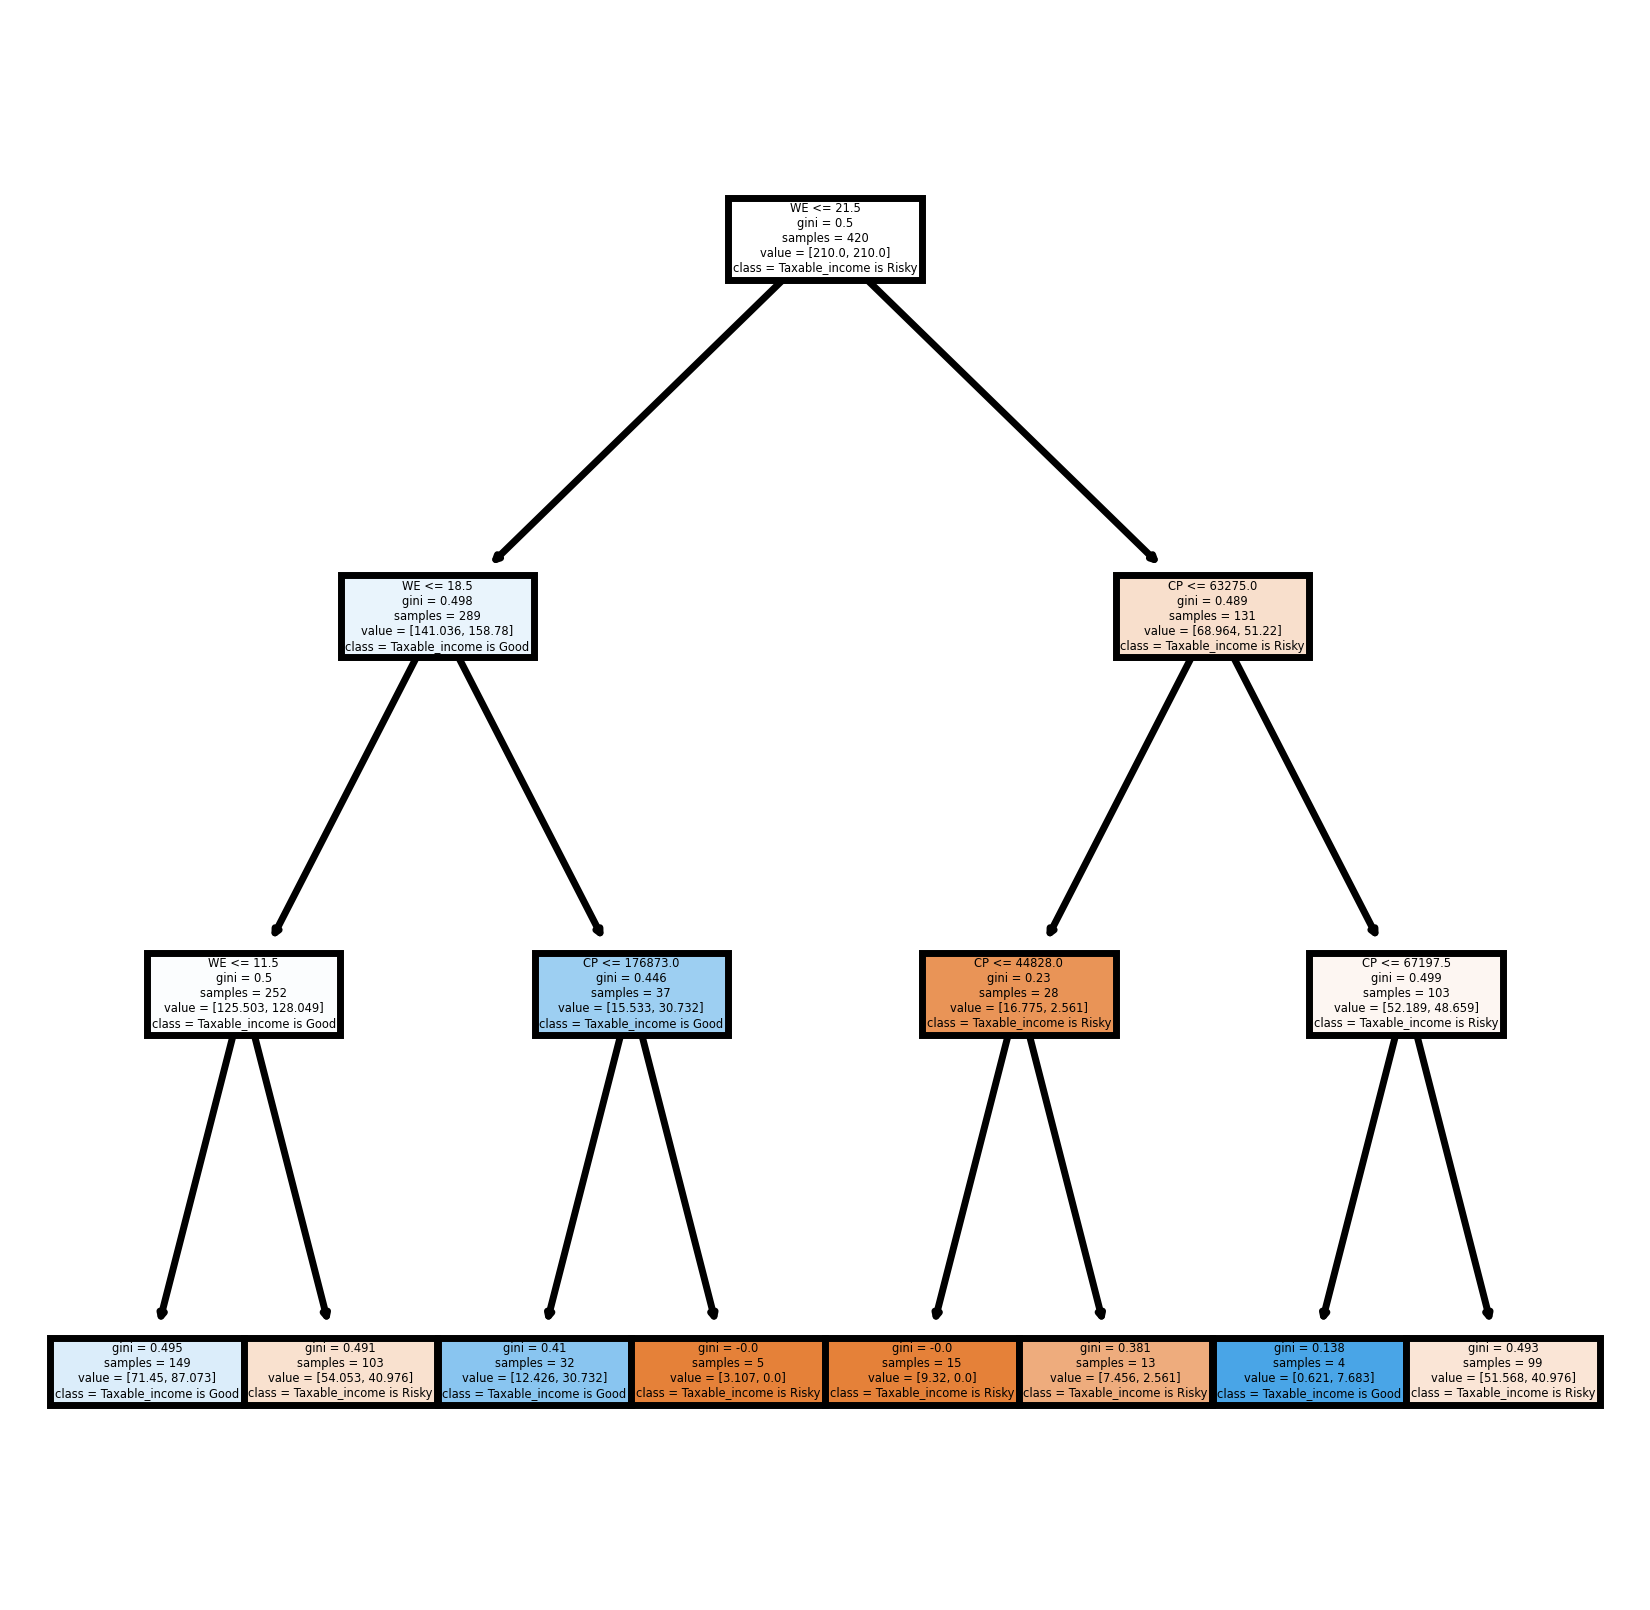

In [26]:
# Extraction features- 
fn = ['UG','MS','CP','WE','Urban']
cn = ['Taxable_income is Risky', 'Taxable_income is Good']
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4),dpi = 500)
tree.plot_tree(model_2,
              feature_names= fn,
              class_names= cn,
              filled = True);

In [27]:
#predicting on data set
preds_2= model_2.predict(x_test)
preds_2[0:60]

array(['Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good'],
      dtype=object)

In [28]:
pd.Series(preds_2).value_counts()

Risky    91
Good     89
dtype: int64

In [29]:
np.mean(preds_2==y_test)

0.46111111111111114

In [30]:
print("Accuracy CART: ", accuracy_score(y_test,preds_2)*100)

Accuracy CART:  46.111111111111114


### 3.Model by --> Bagging 

In [31]:
dcmodel_3= BaggingClassifier(DecisionTreeClassifier(max_depth= 6), random_state=7)

In [32]:
# Train decision tree
dcmodel_3 = dcmodel_3.fit(x_train,y_train) 
y_preds_3 = dcmodel_3.predict(x_test)

In [33]:
y_preds_3[0:20]

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good'], dtype=object)

In [34]:
np.mean(y_preds_3 == y_test)*100

76.11111111111111

In [35]:
print("Accuracy by Bagging Classifier : ", np.round((accuracy_score(y_test,y_preds_3)*100),2)) 

Accuracy by Bagging Classifier :  76.11


In [36]:
print(confusion_matrix(y_test,y_preds_3))
print(classification_report(y_test,y_preds_3))

[[135   3]
 [ 40   2]]
              precision    recall  f1-score   support

        Good       0.77      0.98      0.86       138
       Risky       0.40      0.05      0.09        42

    accuracy                           0.76       180
   macro avg       0.59      0.51      0.47       180
weighted avg       0.68      0.76      0.68       180



### 4. Model by --> Boosting

In [37]:
dcmodel_4 = AdaBoostClassifier(DecisionTreeClassifier(max_depth= 6),random_state=7)

In [38]:
dcmodel_4 = dcmodel_4.fit(x_train,y_train) 
y_preds_4 = dcmodel_4.predict(x_test)

In [39]:
y_preds_4 [0:50]

array(['Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good'], dtype=object)

In [40]:
np.mean(y_preds_4==y_test)*100

67.77777777777779

In [41]:
print("Accuracy by AdaBoost Classifier : ", accuracy_score(y_test,y_preds_4)*100 )

Accuracy by AdaBoost Classifier :  67.77777777777779


In [42]:
print(confusion_matrix(y_test,y_preds_4))
print(classification_report(y_test,y_preds_4))

[[117  21]
 [ 37   5]]
              precision    recall  f1-score   support

        Good       0.76      0.85      0.80       138
       Risky       0.19      0.12      0.15        42

    accuracy                           0.68       180
   macro avg       0.48      0.48      0.47       180
weighted avg       0.63      0.68      0.65       180



### 5. Model using -->  Random Forest

In [43]:
rf = RandomForestClassifier(n_jobs = 3,oob_score = True,n_estimators = 15,criterion ="entropy")

In [44]:
num_trees= 100
max_features= 3
kfold= KFold(n_splits=10)

In [45]:
model_5 = RandomForestClassifier(n_estimators= num_trees, max_features= max_features)
model_5.fit(x_train, y_train)

RandomForestClassifier(max_features=3)

In [46]:
results = cross_val_score(model_5, x, y, cv= kfold)
results

array([0.76666667, 0.75      , 0.65      , 0.7       , 0.73333333,
       0.66666667, 0.85      , 0.71666667, 0.73333333, 0.85      ])

In [47]:
print(results.mean())

0.7416666666666667


In [48]:
y_preds_5 = model_5.predict(x_test)
y_preds_5 [0:40]

array(['Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good'],
      dtype=object)

In [49]:
crosstable = pd.crosstab(y_test, y_preds_5)
crosstable

col_0,Good,Risky
TI,,
Good,128,10
Risky,41,1


In [50]:
#We are comparing the predicted values with the actual values and calculating mean for the matches
np.mean(y_preds_5 ==y_test)

0.7166666666666667

In [51]:
print(classification_report(y_preds_5, y_test))

              precision    recall  f1-score   support

        Good       0.93      0.76      0.83       169
       Risky       0.02      0.09      0.04        11

    accuracy                           0.72       180
   macro avg       0.48      0.42      0.44       180
weighted avg       0.87      0.72      0.79       180



In [52]:
rf.fit(x_train,y_train)# Fitting RandomForestClassifier model from sklearn.ensemble 
print("no of estimators: ",rf.estimators_) 
print("no of class labels: ",rf.classes_)    # class labels (output)
print("no of class labels: ",rf.n_classes_)    # Number of levels in class labels 
print("no of features : ",rf.n_features_)    # Number of input features in model 8 here 
print("no of outputs : ",rf.n_outputs_)      # Number of outputs when fit performed
print("out of bag score : ",np.round(rf.oob_score_*100)) # Number of correctly predicted rows from the out of bag sample

no of estimators:  [DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1144185448), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1565371968), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=992487793), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=2034336915), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1545977006), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=1660051683), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=922000115), DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=972037479), DecisionTreeClassifier(criterion='entropy', max_features='auto',
      

In [53]:
rf.predict(x_test) [0:50]

array(['Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good'], dtype=object)

In [54]:
y_preds_5 =rf.predict(x_test)
pd.Series(y_preds_5).value_counts()

Good     165
Risky     15
dtype: int64

In [55]:
y_preds_5 [0:40]

array(['Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good'],
      dtype=object)

In [56]:
crosstable = pd.crosstab(y_test,y_preds_5)
crosstable

col_0,Good,Risky
TI,,
Good,126,12
Risky,39,3


In [57]:
print(classification_report(y_preds_5, y_test))

              precision    recall  f1-score   support

        Good       0.91      0.76      0.83       165
       Risky       0.07      0.20      0.11        15

    accuracy                           0.72       180
   macro avg       0.49      0.48      0.47       180
weighted avg       0.84      0.72      0.77       180



#### Comparison of all models:

In [58]:
print("Accuracy by C5: ",np.round(accuracy_score(y_test,preds_1)*100))
print("Accuracy by CART: ",np.round(accuracy_score(y_test,preds_2)*100))
print("Accuracy by Bagging Classifier : ",np.round(accuracy_score(y_test,y_preds_3)*100))
print("Accuracy by Adaboost : ",np.round(accuracy_score(y_test,y_preds_4)*100))
print("Accuracy by Random Forest : ", np.round(accuracy_score(y_test,y_preds_5)*100))

Accuracy by C5:  71.0
Accuracy by CART:  46.0
Accuracy by Bagging Classifier :  76.0
Accuracy by Adaboost :  68.0
Accuracy by Random Forest :  72.0
